# [*Lab Project Part 2*]() CNNs for Image Classification
------------------------------

### General Guideline
1. Aim:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning frameworks (e.g. PyTorch).*
2. Prerequisite:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*

### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known frameworks for deep learning tasks.  

## Session 1: Image Classifiation on CIFAR 10
### Install pytorch and run the given codes

In [1]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from math import sqrt
from torch.utils.data import DataLoader
#from torch.utils.data import Dataset

print(torch.__version__)

#Device configuration
device=torch.device('cpu')
if torch.cuda.is_available():
     device=torch.device('cuda')

batch_size = 32
print(device)

1.9.0
cpu


In [29]:
DATASET_DIR = "./datasets/CIFAR-10/"

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=DATASET_DIR, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=DATASET_DIR, train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [40]:
x, l = trainset[0]
print(x.shape, x.dtype)
print(l, type(l))

torch.Size([3, 32, 32]) torch.float32
6 <class 'int'>


In [36]:
x.to(torch.float32).shape

torch.Size([3, 32, 32])

####  *` Q2.1: test dataloader and show the images of each class  of CIFAR10`*  

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [31]:
images.shape

torch.Size([32, 3, 32, 32])

 deer   cat truck plane   car horse  bird plane
horse horse   dog truck  frog truck truck   dog
 deer  bird horse   dog  frog  deer   cat truck
 bird  ship  deer truck   car   cat horse   cat


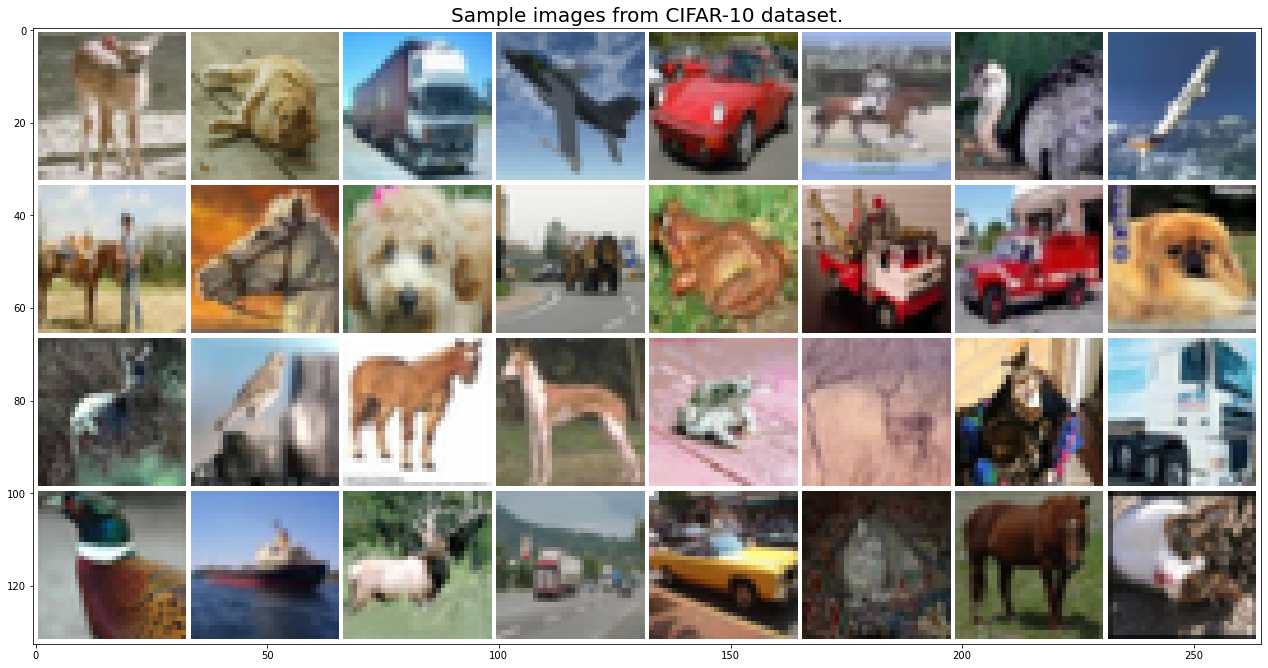

In [4]:
# fix seed
SEED = 0
torch.manual_seed(SEED)
np.random.seed(SEED)

# get some random training images
plt.figure(figsize=(22, 15))

while True:
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    if len(set(labels)) >= 10:
        break
        
plt.title("Sample images from CIFAR-10 dataset.", fontsize=20)
plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(
            images.to(device),
            padding=1,
            normalize=True,
            pad_value=1,).cpu(),(1,2,0)));
    
plt.savefig("./results/cifar10-samples.png", bbox_inches="tight")

for i in range(4):
    print(' '.join('%5s' % classes[labels[j]] for j in range(i*8, i*8 + 8)))

####  *` Q2.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet.`*  

In [5]:
class TwolayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self, num_inputs, num_hidden, num_classes):
        '''
        :param input_size: 3*32*32
        :param hidden_size: decide by yourself e.g. 1024, 512, 128 ...
        :param num_classes: 
        '''
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_classes = num_classes
        
        super(TwolayerNet, self).__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, num_classes)
        
    def forward(self,x):
        # flatten
        x = x.view(x.shape[0], -1)
        x = self.linear1(x)
        x = self.act_fn(x)
        scores = self.linear2(x)
        return scores
    
TwolayerNet(num_inputs = 3*32*32, num_hidden = 50, num_classes = 10)

TwolayerNet(
  (linear1): Linear(in_features=3072, out_features=50, bias=True)
  (act_fn): ReLU()
  (linear2): Linear(in_features=50, out_features=10, bias=True)
)

In [6]:
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self, in_channels, num_classes):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels = 6, kernel_size = 5, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1)
        self.linear1 = nn.Linear(in_features = 400, out_features = 120)
        self.linear2 = nn.Linear(in_features = 120, out_features = 84)
        self.linear3 = nn.Linear(in_features = 84, out_features = num_classes)
        self.pool = nn.AvgPool2d(kernel_size = 2, stride = 2)
        self.act_fn = nn.Tanh()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.act_fn(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.act_fn(x)
        x = self.pool(x)

        x = x.view(x.size()[0], -1)

        x = self.linear1(x)
        x = self.act_fn(x)
    
        x = self.linear2(x)
        x = self.act_fn(x)

        x = self.linear3(x)

        return x
    
ConvNet(in_channels = 3, num_classes = 10)

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=400, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=84, bias=True)
  (linear3): Linear(in_features=84, out_features=10, bias=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (act_fn): Tanh()
)

In [7]:
#Optimzer and loss function
criterion = nn.CrossEntropyLoss()

In [13]:
# can be installed via `pip install tqdm` if not already installed
from tqdm import tqdm

In [23]:
## exmample. You can change and modify it if you like.
## use the above defined trainloader directly and train the models 
def train(net, trainloader, num_epochs, lr):
    
    optimizer = optim.SGD(net.parameters(), lr, momentum=0.9)
    
    loss_history = []
    correct_history=[]

    for epoch in range(num_epochs):  
        running_loss = 0.0
        correct = 0
        total = 0
        
        iterator = tqdm(trainloader, f"TRAINING: Epoch {epoch}", bar_format='{l_bar}{bar:10}{r_bar}{bar:-10b}')
        for i, (images, labels) in enumerate(iterator):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            batch_loss = loss.item()
            iterator.set_description(f"TRAINING: Epoch: {epoch} Loss: {batch_loss:.3f}")
            
            running_loss += batch_loss
            
            #Accuracy
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        iterator.set_description(f"TRAINING: Epoch: {epoch} Batch loss: {epoch_loss:.2f}")
        
        loss_history.append(epoch_loss)  
        correct_history.append(epoch_acc) 
            
        print(f'Epoch [{epoch + 1}/{num_epochs}]: Loss:{epoch_loss:.4f}')
        print('Accuracy of the network on the 50000 train images: %d %%' % (100 * correct / total))
    
    plt.title(f"Training loss for {type(net).__name__}")
    plt.plot(loss_history, label='Training Loss')       
    plt.grid()
    plt.legend()    
    plt.show()
    
    plt.title(f"Training accuracy for {type(net).__name__}")
    plt.plot(correct_history, label='Training accuracy')
    plt.grid()
    plt.legend()
    plt.show()

    print('Finished Training')

####  Train Two-layer Net

TRAINING: Epoch: 0 Loss: 1.117: 100%|██████████| 1563/1563 [00:15<00:00, 102.74it/s]                                                       


Epoch [1/2]: Loss:1.6841
Accuracy of the network on the 50000 train images: 40 %


TRAINING: Epoch: 1 Loss: 1.594: 100%|██████████| 1563/1563 [00:15<00:00, 103.66it/s]                                                       

Epoch [2/2]: Loss:1.5091
Accuracy of the network on the 50000 train images: 46 %


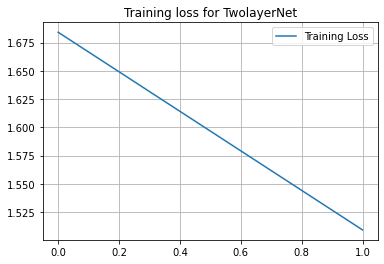

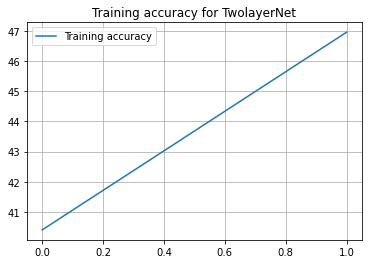

Finished Training


In [24]:
num_inputs = 3 * 32 * 32
num_hidden = 50
num_classes = 10
netTwoLayer = TwolayerNet(num_inputs, num_hidden, num_classes).to(device)
train(netTwoLayer, trainloader, num_epochs = 2, lr = 0.005)

#### Train ConvNet - LeNet-5

TRAINING: Epoch: 0 Loss: 1.637: 100%|██████████| 1563/1563 [00:21<00:00, 74.24it/s]                                                        


Epoch [1/2]: Loss:1.7373
Accuracy of the network on the 50000 train images: 37 %


TRAINING: Epoch: 1 Loss: 1.070: 100%|██████████| 1563/1563 [00:20<00:00, 75.60it/s]                                                        

Epoch [2/2]: Loss:1.4372
Accuracy of the network on the 50000 train images: 48 %


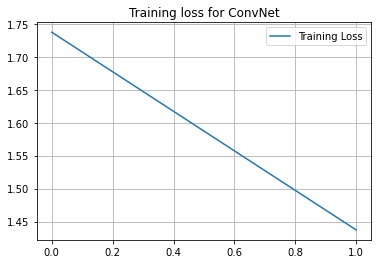

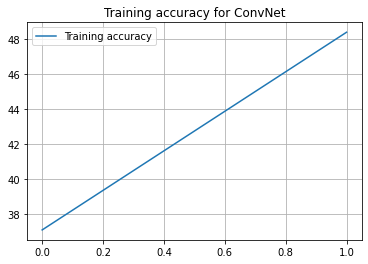

Finished Training


In [25]:
in_channels = 3 
num_classes = 10
netConv = ConvNet(in_channels, num_classes).to(device)
train(netConv , trainloader, num_epochs = 2, lr = 0.01)

In [26]:
def valid(net,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

In [27]:
valid(netTwoLayer, testloader)

Accuracy of the network on the 10000 test images: 47 %


In [28]:
valid(netConv, testloader)

Accuracy of the network on the 10000 test images: 51 %


In [ ]:
def valid_class(net, testloader, classes):
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for i, (images, labels) in enumerate(testloader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predicted = outputs.max(1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(len(classes)):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
valid_class(netTwoLayer, testloader, classes)

In [ ]:
valid_class(netConv, testloader, classes)

####  *` Q2.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.`*  

#### *` Complement  CIFAR10_loader()`*

In [30]:
###  suggested reference: https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image

class CIFAR10_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
        
        ################################
        # Todo: finish the code
        ################################
        

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        ################################
        # Todo: finish the code
        ################################

        return img, target

IndentationError: expected an indented block (3401638276.py, line 12)

#### *` Complement Transform function and Optimizer`*

In [ ]:
class SquashTransform:
    def __call__(self, inputs):
        return 2 * inputs - 1

transformations = transforms.Compose([transforms.Pad(4),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomCrop(32),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                      SquashTransform()])

train_set = CIFAR10_loader(path = "E:/UvA AI/Computer Vision-1/Project/labfinal2/data", transforms = transformations, train = True)
print(len(train_set))

test_set = CIFAR10_loader(path = "E:/UvA AI/Computer Vision-1/Project/labfinal2/data",transforms = transformations, train = False)
print(len(test_set))

train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 64, shuffle=True, num_workers=2)

print(len(train_loader))
print(len(test_loader))

In [ ]:
netConv = ConvNet(in_channels, num_classes).to(device)
train(netConv , train_loader, num_epochs = 5, lr = 0.01)

#### *` Train the ConvNet with CIFAR10_loader, transform and optimizer you implemented and compare the results`*

In [ ]:
def train(net, train_loader, num_epochs):
    
    for epoch in range(num_epochs): 
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            optimizerConvNet.zero_grad()
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizerConvNet.step()
            running_loss += loss.item()
            
            #Accuracy
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        
        loss_history.append(epoch_loss)  
        correct_history.append(epoch_acc) 
            
        print(f'epoch [{epoch + 1}/{num_epochs}], loss:{epoch_loss:.4f}')
        print('Accuracy of the network on the 50000 train images: %d %%' % (100 * correct / total))

    plt.plot(loss_history, label='Training Loss')       
    plt.legend()    
    plt.show()  
    plt.plot(correct_history, label='Training accuracy')        
    plt.legend()    
    plt.show()
    print('Finished Training')
    
netCONV = ConvNet(in_channels, num_classes).to(device)
optimizerConvNet = optim.SGD(netCONV.parameters(), lr = 0.01, momentum=0.9)
train(netCONV, train_loader, num_epochs = 5)

#### *` Q2.4 Setting up the hyperparameters.`*

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [ ]:
class twolayernet(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_classes):
        '''
        :param input_size: 3*32*32
        :param hidden_size: decide by yourself e.g. 1024, 512, 128 ...
        :param num_classes: 
        '''
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_classes = num_classes
        
        super(TwolayerNet, self).__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.linear2 = nn.Linear(num_hidden, 20)
        self.linear3 = nn.Linear(20, num_classes)
        
    def forward(self,x):
        # flatten
        x = x.view(x.shape[0], -1)
        x = self.linear1(x)
        x = self.act_fn(x)
        scores = self.linear2(x)
        return scores
    
class convnet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5, stride = 1)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5, stride = 1)
        self.linear1 = nn.Linear(in_features = 400, out_features = 120)
        self.linear2 = nn.Linear(in_features = 120, out_features = 84)
        self.linear3 = nn.Linear(in_features = 84, out_features = 40)
        self.linear4 = nn.Linear(in_features = 40, out_features = num_classes)
        self.pool = nn.AvgPool2d(kernel_size = 2, stride = 2)
        self.act_fn = nn.Tanh()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.act_fn(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.act_fn(x)
        x = self.pool(x)
        x = x.view(x.size()[0], -1)
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        x = self.act_fn(x)
        x = self.linear3(x)
        x = self.act_fn(x)
        x = self.linear4(x)
        return x
    
twolayernet(num_inputs = 3*32*32, num_hidden = 50, num_classes = 10)
convnet(in_channels = 3, num_classes = 10)

num_inputs = 3 * 32 * 32
num_hidden = 50
num_classes = 10
in_channels = 3 

nettwolayer = twolayernet(num_inputs, num_hidden, num_classes).to(device)
train(nettwolayer, trainloader, num_epochs = 5, lr = 0.005)
netconv = convnet(in_channels, num_classes).to(device)
train(netconv, trainloader, num_epochs = 5, lr = 0.01)

#### *` test the accuracy of ConvNet `*

In [ ]:
valid(netconv, test_loader)

#### *`test the accuracy of TwolayerNet`*

In [ ]:
valid(nettwolayer, test_loader)

## Session 2:  Finetuning the ConvNet
### STL-10 DATASET
> The provided network is trained on a different dataset named CIFAR-10 , which
contains the images of 10 different object categories. The dataset we use throughout the assignment is a subset of STL-10 
with larger sizes and different object classes. So, there is a discrepancy between the
dataset we use to train (CIFAR-10) and test (STL-10) our network. One solution
would be to train the whole network from scratch. However, the number of param-
eters are too large to be trained properly with such few number of images provided.
One solution is to shift the learned weights in a way to perform well on the test
set, while preserving as much information as necessary from the training class.
### In this Session, extract 5 classes from STL training dataset , 
the the label of images can be defined as `{1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}`

#### *`Q3.1 create the STL10_Dataset `*

In [ ]:
from stl10_data import *
class STL10_Dataset(Dataset):
    def __init__(self,root,train=True,transform = None):
        ################################
        # Todo: finish the code
        ################################

 

    def __len__(self):
        ################################
        # Todo: finish the code
        ################################

    def __getitem__(self, item):
        ################################
        # Todo: finish the code
        ################################

        return img, target
classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#### *`Q3.2  Finetuning from ConvNet & train the model and show the results`*

In [ ]:
netConv = ConvNet(in_channels, num_classes).to(device)
train(netConv, trainloader, num_epochs = 2, lr = 0.01)

In [ ]:
valid(netConv, testloader)

In [ ]:
valid_class(netConv, testloader, classes)

###  `Bonus`

In [ ]:
pass